# Model Project - Ramsey-Cass-Koopman model

In [29]:
import numpy as np
import pandas as pd
from scipy import optimize
import mpmath as mp
import matplotlib.pyplot as plt

The Ramsey model is a neoclassical growth model first presented by Frank Ramsey. It is similar to the Solow model as the production side 
is assumed to consist of many firms in a perfectly competitive market resulting in factor prices being equal to marginal products. Specifically, the production is assumed to satisfy the Inada conditions and modelled by techology diplaying constant returns to scale and diminishing returns to the inputs of capital and labour individually:

\\[F(\lambda K, \lambda L) = \lambda F(K,L), \ \lambda > 0. \ \ \text{For} \ i = K,L: \ F_i > 0, \ F_{ii} < 0 \ \lim_{i \rightarrow 0^+} = \infty, \ \lim_{i \rightarrow \infty} = 0^+. \\] 

A commonly used production function possessing these properties is the Cobb-Douglas:

\\[F(K,L) = K^\alpha L^{1 - \alpha}, \ \ 0 < \alpha < 1, \ F_K = r, \ F_L = w \\]

The modelling of the capital accumulation proces is also quite similar. Assuming that capital is the only kind of asset in the economy, we can write the law of motion of capital per worker (discrete time):

\\[k_{t+1} = F\left(\frac{K_t}{L_t}, 1\right) - c_t + (1-\delta)K_t, \ k \equiv \frac{K}{L}, \ c \equiv \frac{C}{L}, \ 0 < \delta < 1.\\] 

The main difference is that the savings rate is endogenously determined in the Ramsey model. The endogeneity of the savings rate follows from modelling the consumer side of the economy consisting of many
homogenous, infinitly living consumers rationally maximizing their own utility and inelastically supplying their labour. Utility is assumed to display positive, decreasing marginal utility. Assuming that the No-Ponzi-game-condition is fulfilled and initial values given, the maximization problem can be written:

\\[\underset{\{c_t\}^\infty_{t=0}}{max} \sum^{\infty}_{t = 0} \beta^t u(c_t), \ \ u'>0, \ u''< 0, \ \ 0 < \beta < 1, \ \ \text{st.} \ \ k_{t+1} = (1+r_t - \delta)k_t + w_t - c_t \\] 

The FOC yields the Euler equation:

\\[ \frac{u'(c_t)}{u'(c_{t+1})} = \beta(1+r_t - \delta) \\]

Implicitly yielding savings in each period. The law of motion of the economy as a whole is given by the values of consumption per worker and capital per worker simultanously solving the law of motion of capital per worker and the Euler. The loci of capital and consumption are defined as the curces where c and k are kept constant:

\\[k: \{(k,c) \mid c = f(k) - \delta\} \ \ \text{and} \ \ c: \{(k,c) \mid 1 = \beta(1 + r - \delta) \}  \\]

In [2]:
# Define parameter values:
params = {}

params['delta'] = 0.10
params['alpha'] = 1/3 
params['theta'] = 2 # as theta > 1, the income effect dominates
params['beta']  = 0.96  

In [3]:
# Define utility (CRRA):
def u(C):
    
    """
    We assume CRRA utility. Individuals derive utility solely from consumption, C. 
    The parameter theta play two significant roles; the representative agents coefficient 
    of relative risk aversion and the inverse of the elasticity of intertemporal
    substitution.
    Note, as theta tends towards 1, CRRA utility becomes log-utility (by applying 
    l'Hôpital's rule).

    The function takes consumption as input and returns the value of utility from consumption.
    """
    
    # Fetching the parameter from the params dictionary.
    theta = params['theta']
    
    if theta != 1.0:
        return (C**(1 - theta) - 1) / (1 - theta)
    else:
        return np.log(C)

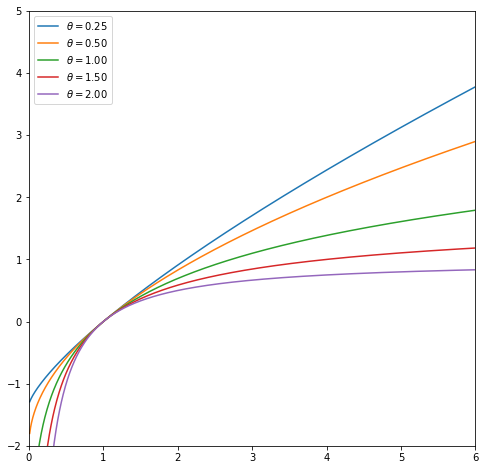

In [4]:
# Plotting the utility function for different values of theta:

grid = np.linspace(0.01, 6, 1000)

plt.figure(figsize=(8,8))

params['theta'] = 0.25
plt.plot(grid, u(grid),'-',label=r'$\theta=%.2f$' %params['theta'])

params['theta'] = 0.50
plt.plot(grid, u(grid),'-',label=r'$\theta=%.2f$' %params['theta'])

params['theta'] = 1.00
plt.plot(grid, u(grid),'-',label=r'$\theta=%.2f$' %params['theta'])

params['theta'] = 1.50
plt.plot(grid, u(grid),'-',label=r'$\theta=%.2f$' %params['theta'])

params['theta'] = 2.00
plt.plot(grid, u(grid),'-',label=r'$\theta=%.2f$' %params['theta'])

plt.axis([0,6,-2,5])

plt.legend(loc=0, frameon=True)

The plot above graphically shows the CRRA utility function for different values of theta. 
Notice that the function displays positive diminishing marginal utility of consumption. That is; $u'(C)>0, \ u''(C)<0$.

In [8]:
# Define Cobb-Douglas production technology:
def F(K, L):
    
    """
    Usual CD-production function. 
    Takes aggregate capital and labor as inputs and returns aggregate production.
    """
    
    alpha = params['alpha']
    
    return K**alpha * L**(1 - alpha)

# Real wage, assumed to be the marginal product of labor:
def w(K, L):
    alpha = params['alpha']
    
    MPL = (1-alpha) * K**alpha * L**(-alpha)
    return MPL

# Return to capital, assumed to be the marginal product of capital:
def r(K, L):
    alpha = params['alpha']
    
    MPC = alpha * K**(alpha-1) * L**(1-alpha)
    return MPC

In [9]:
in_vals = {} # Initial values

in_vals['K0'] = 10.0 # Initial capital holdings
in_vals['L0'] = 1 # Labor supply normalized to 1

In [10]:
# Checker det lige ud:
w0 = w(in_vals['K0'],in_vals['L0'])
print(f'Initially, the real wage is:          {w0:.2f}')

r0 = r(in_vals['K0'],in_vals['L0'])
print(f'Initially, the real rental rate is:   {r0:.2f}')

Initially, the real wage is:          1.44
Initially, the real rental rate is:   0.07


## Tænker lidt omkring de analytiske løsninger (til forelæsningerne plejer de at introducere dem)
Given Cobb-Douglas production technology and CRRA-utility we find the Euler,
\\[
c_{t+1} = \left( \beta\cdot(1+r_{t+1}-\delta)\right)^{\frac{1}{\theta}}\cdot c_t, \\]
and the law of motion for capital,
\\[
k_{t+1} = \underbrace{(1-\delta)k_t}_{\text{Remaining capital after depreciation}}+\underbrace{f(k_t)-c_t}_{\text{Aggregate savings}}.
\\]

We now turn to define production per capita as well as the laws of motion. Finally, we define the change in capital per capita and consumption per capita, 
\begin{align*}
\Delta k &= k_{t+1}-k_t\\
\Delta c &= c_{t+1}-c_t,
\end{align*}

which we will use in the numerical analysis.

In [11]:
# Defining production per capita:
def f(k):
    
    """
    Inputs: Capital per capita
    Returns: Production per capita
    """
    
    # Fetching the parameter from the params dictionary
    alpha = params['alpha']
    
    return k**alpha



# Law of motion (lom) for capital. Capital at t+1 as a function of capital this period and savings:
def lom_k(k,c):
    # Fetching the parameter from the params dictionary
    delta = params['delta']
    
    return (1-delta)*k + f(k) - c

# The change in capital each period: 
def delta_k(k,c):
    return lom_k(k,c) - k


# Defining the Euler equation:
def euler(k,c):
    # Fetching parameters
    alpha = params['alpha']
    beta  = params['beta']
    delta = params['delta']
    theta = params['theta']
    
    rplus = alpha * lom_k(k,c)**(alpha-1) # rental rate in the next period
    return (beta * (1 + rplus - delta))**(1 / theta) * c

# Change in consumption each period:
def delta_c(k,c):
    return euler(k,c) - c

The Ramsey model has the closed form solutions:

\begin{align*}
k^* &= \left(\frac{\alpha\beta}{(1-\beta(1-\delta))}\right)^{\frac{1}{1-\alpha}} \\
c^* &= f(k^*)-\delta\cdot k^*
\end{align*}

This allows us to define the steady state values as function below.

In [12]:
# Analytical solutions

# Steady state capital:
def k_star():
    alpha = params['alpha']
    delta = params['delta']
    beta = params['beta']
    theta = params['theta']
    
    return (alpha * beta / (1 - beta * (1 - delta)))**(1 / (1 - alpha))

# Steady state consumption:
def c_star():
    delta = params['delta']
    
    return f(k_star()) - delta * k_star()

Now that we have found the analytical solutions, we look to find the solutions numerically. That is, we solve two non-linear equations in two unknowns. As consumption and capital per capita is constant in steady state, we solve $\Delta k = 0, \ \ \Delta c = 0$.

In [13]:
# Numerical optimization
def ramseySteadyState(X):
    out = [delta_k(X[0], X[1])]
    out.append(delta_c(X[0], X[1]))
    return out

# Defining values for our initial guess:
in_guess = (3,1)
numeric_k_star, numeric_c_star = optimize.fsolve(func=ramseySteadyState, x0=in_guess)

In [14]:
# Display numerical steady-state values and compare to analytic solutions
print("Numeric k*:  ", numeric_k_star)
print("Analytic k*: ", k_star())

print("Numeric c*:  ", numeric_c_star)
print("Analytic c*: ", c_star())

Numeric k*:   3.609247006339283
Analytic k*:  3.6092470063405653
Numeric c*:   1.173005277060939
Analytic c*:  1.173005277060684


## Initial bundles and convergence to steady state
Ultimately, the convergence to the steady state is determined by the law of motion of capital and consumption and their respective locis. The loci of capital can be described as the levels of capital and consumption that ensures a constant level of capital (all in per worker terms): When consumtion is higher than the level of investment required for a constant level of capital then capital will be decreasing and vice versa. The loci of consumption is similarly the levels of capital and consumption that results in a constant level of consumtion (again, all per worker terms): When capital is low, the rental rate of capital is high. A high rental rate makes postponing consumption relatively more preferable to consuming now and thus consumption growth will be positive. Vice versa, a high level of capital results in a negative growth in consumption. 

The dynamics described above will ensure convergence to steady state IF the initial values are such that the economy is on it's balanced growth path. In the section below, we will determine an initial bundle of capital per worker and consumption per worker that ensures convergence to steady state


**The algortithm can be explained as follows:**
* First chose an initial level of capital, $k_0$, and a tolerance level, $\varepsilon$.

    * Set initial consumption bounderies (determined by $k_0$):
     \begin{align*}
     (\underline{c_0}, \bar{c_0})= \begin{cases} (0; f(k_0)-\delta k_0), \quad &k_0 < k^* \\
     (f(k_0)-\delta k_0; f(k_0)+k_0-\delta k_0), \quad &k_0 \geq k^* \end{cases}
     \end{align*}
     
         * This must be the case. If initial capital is below steady state level we can consume anywhere in between zero and the steady state amount of consumption. On the other hand, if initial capital is above its equilibrium level we can consume more today and decrease capital until we reach equilibrium.
         
         
* Now, set $c=c_0 = \frac{(\underline{c_0}+\bar{c_0})}{2}$ and $k=k_0$.

* Use the laws of motion to determine the evolution of capital per worker and consumption per worker from the initial values. 

    * If the current values of capital and consumption are arbitrarily close to steady state values we have reached the the steady state and the algorithm breaks.
    
    * If $k_0 \leq k^*$,
        * If $c \leq c^*$ and $k \leq k^*$ proceed by evaluating current values of capital consumption in their respective laws of motion. 
        * If the resulting $k$ is such that $k> k^*$, the algorithm re-runs choosing a new and higher initial level of consumption. Specifically, we set $\underline{c_0} = c_0$.
            * Alternatively, if $c>c^*$ the algorithm will re-run, now chosing a lower initial consumption level; $\bar{c_0}=c_0$.
                                   
    * If $k_0 > k^*$,
        * If $c \geq c^*$ and $k \geq k^*$ proceed by evaluating current values in laws of motion.
        * If the resulting $k$ is such that $k<k^*$, the algorithm re-runs chosing a new and lower consumption level. Specifically, we set $\bar{c_0}=c_0$.
            * Alternatively, if $c<c^*$ the algorithm will re-run, now chosing a higher initial consumption level; $\underline{c_0}=c_0$.
            
Intuitively, the algorithm makes initial consumption jump up or down for given initial capital holdings, until it (almost) reaches the balanced growth path.

This is called the forward shooting algorithm and will eventually find an initial value of consumption, that will ensure convergence to steady state.

In [15]:
# Defining the two-dimensional Euclidian distance from the current values of capital and consumption
# (both in per capita terms) to the long run equilibrium values.
def dist_to_ss(k,c):
    return np.sqrt((k-k_star())**2 + (c-c_star())**2)

In [16]:
saddlepath_max_iter = 1000 # Setting max number of iterations
saddlepath_T = 1000 # Setting max number of time periods to reach steady state

def find_inital_c_on_saddlepath():
    
    """
    Computes the full, non-linear saddle path for the Ramsey model using the 
    'forward shooting' algorithm. 
    Returns an initial bundle that will ensure convergence.
    """
    
    # i. Fetching parameters and chosing initial capital per capita and tolerence.
    k0 = 1.00
    delta = params['delta']
    epsilon = 1e-8
    
    # Defining boundries for the economy:
    if k0 < k_star():
        c_low = 0
        c_high = f(k0) - delta*k0
    else:
        c_low = f(k0) - delta*k0
        c_high = f(k0) + k0*(1-delta)
    
    # For plotting:
    c0_path = np.nan * np.ones(saddlepath_max_iter)
    c_high_path = np.nan * np.ones(saddlepath_max_iter)
    c_low_path = np.nan * np.ones(saddlepath_max_iter)
    
    # The algorithm:
    t = 0
    it = 0
    while it < saddlepath_max_iter:
        if t==0:
            c0 = (c_low + c_high) / 2
            k = k0
            c = c0
            
            c0_path[it] = c0
            c_low_path[it] = c_low
            c_high_path[it] = c_high
            
            it += 1
        t += 1

        k = lom_k(k,c)
        c = euler(k,c)
        dist = dist_to_ss(k,c)        
        
        if dist < epsilon or t > saddlepath_T:
            break # If the algorithm breaks due to the distance being lower than the tolerance, 
                  # we have found a solution. 
        elif k0 <= k_star():
            if c <= c_star() and k <= k_star():
                continue # Keep evaluating laws of motion. 
            else: 
                t = 0 # Restart time and update initial consumption guess.
                if k > k_star():
                    c_low = c0
                elif c > c_star():
                    c_high = c0
        else:
            if c >= c_star() and k >= k_star():
                continue # Similarly, keep evaluating laws of motion
            else:
                t=0 # Once again, restarts time and update initial consumption guess.
                if k < k_star():
                    c_high = c0
                elif c < c_star():
                    c_low = c0
                    
    k0 = k0
    c0 = c0
    
    print(f'c0 = {c0:.4f} will converge.')
    print(f'k0 = {k0:.4f} will converge.')
    return c0_path

In [17]:
c0_path_save = find_inital_c_on_saddlepath()

c0 = 0.7233 will converge.
k0 = 1.0000 will converge.


[-1, 30, 0.4, 0.9]

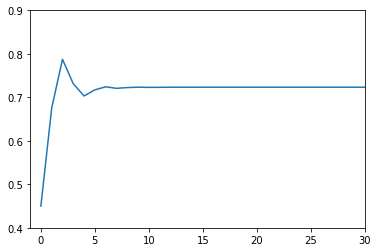

In [28]:
# Plotting the initial consumption guesses for given capital:
plt.plot(c0_path_save)
plt.axis([-1,30,0.4,0.9])

The figure above shows that the algorithm finds the unique initial consumption (for given capital per capita) relatively fast. After approximately 10 iterations, we have reached the consumption level that ensures convergence.